In [32]:
from datetime import date
from os.path import isfile
import time

import warnings
warnings.filterwarnings(action='once')

from fidelity import *
from povm import *
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline




/home/peter/anaconda3/envs/pytorch/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5774259357930542
0.913762307442294
0.805868167337015
0.8862463868900718


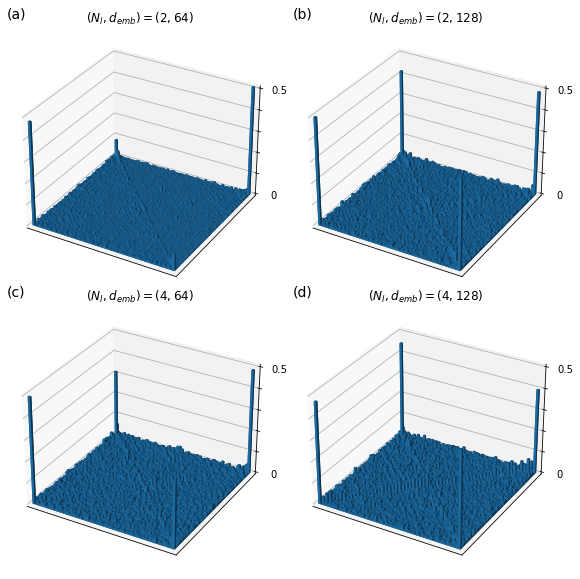

In [34]:

path = 'ghz_6'

dm_state = np.load('ghz_6/6_dm.npy')

Nq = 6
Ns = 72900

Nh = 4
Nep = 200

Nl = [2, 4]
dmodel = [64, 128]

abcd = ['(a)', '(b)', '(c)', '(d)']

fig = plt.figure(figsize=(10, 10))

for r in range(2):
    for c in range(2):
        
        model_filetag = '{}/{}_{}_{}-{}-{}-{}'.format(path, Nq, Ns, Nep, Nl[r], dmodel[c], Nh)
        
        dm = np.load('{}_dm.npy'.format(model_filetag))
        
        print(np.trace(np.matmul(dm_state, dm)).real)
        
        xedges = np.arange(0, 2**Nq+1)
        yedges = np.arange(0, 2**Nq+1)

        # Construct arrays for the anchor positions of the 16 bars.
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0

        # Construct arrays with the dimensions for the 16 bars.
        dx = dy = np.ones_like(zpos)

        dz = []
        for i in range(2**Nq):
            for j in range(2**Nq):
                dz.append(abs(dm[i, j]))

        ax = fig.add_subplot(2, 2, (1+2*r+c), projection='3d')



        ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
        ax.set_zticklabels([0,'','','','','0.5',''])

        ax.set_xbound(-0.2, 2**Nq+0.2)
        ax.set_ybound(-0.2, 2**Nq+0.2)
        ax.set_zbound(0,0.5)

        ax.set_title('$(N_l, d_{emb})=(%i, %i)$'%(Nl[r], dmodel[c]))
        
        ax.annotate(abcd[2*r+c], (0,1.04), fontsize=14, xycoords='axes fraction')
#         ax.set_xticks([0.5, 2**Nq-0.5])
#         ax.set_xticklabels(['000000', '111111'])
#         ax.tick_params(axis='x', pad=-10, labelsize=12)
#         plt.setp( ax.xaxis.get_majorticklabels(), rotation=52, ha="right" )



#         ax.set_yticks([0.5, 2**Nq-0.5])
#         ax.set_yticklabels(['000000', '111111'])
#         ax.tick_params(axis='y', pad=-8, labelsize=12)
#         plt.setp( ax.yaxis.get_majorticklabels(), rotation=-14, ha="left" )


fig.subplots_adjust(wspace=0.05, hspace=0.05)

# fig.savefig('figures/aqt_size.pdf', dpi=300,bbox_inches="tight")

(0.9362466015745956+0j)
(1.0019559158610467+2.168404344971009e-19j)
(0.9831575027094491+1.3010426069826053e-18j)


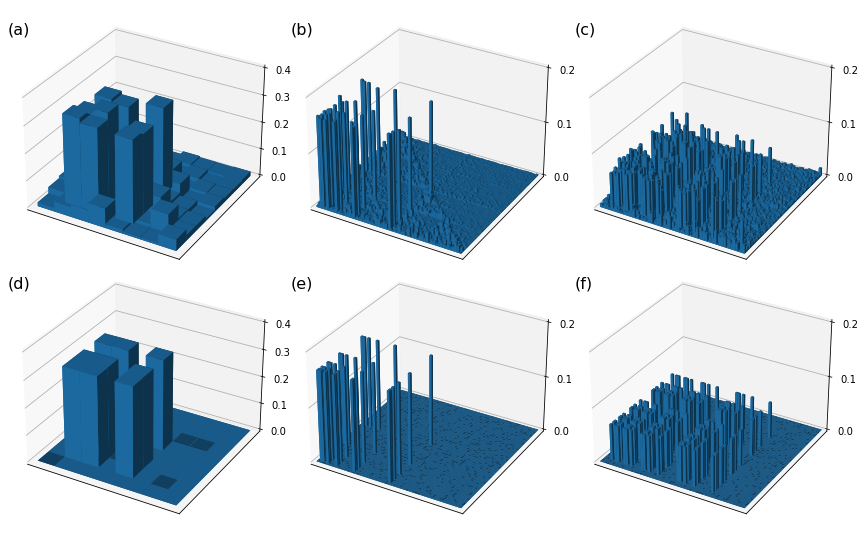

In [31]:
dm_dicke31_model = np.load('dicke_3_1/3_2700_200-2-64-4_dm.npy')
dm_dicke31_state = np.load('dicke_3_1/3_dm.npy')


dm_dicke61_model = np.load('dicke_6_1/6_72900_200-2-64-4_dm.npy')
dm_dicke61_state = np.load('dicke_6_1/6_dm.npy')


dm_dicke62_model = np.load('dicke_6_2/6_72900_200-2-64-4_dm.npy')
dm_dicke62_state = np.load('dicke_6_2/6_dm.npy')

fig = plt.figure(figsize=(15, 10))

Nq = 3

ax = fig.add_subplot(2, 3, 1, projection='3d')
fig, ax = plotDM(dm_dicke31_model, Nq, (fig, ax), axis_labels=False)
ax.set_zbound(0, 0.4)
ax.annotate('(a)', (0,.9), fontsize=16, xycoords='axes fraction')

ax = fig.add_subplot(2, 3, 4, projection='3d')
fig, ax = plotDM(dm_dicke31_state, Nq, (fig, ax), axis_labels=False)
ax.set_zbound(0, 0.4)
ax.annotate('(d)', (0,.9), fontsize=16, xycoords='axes fraction')

print(np.trace(np.matmul(dm_dicke31_model, dm_dicke31_state)))

Nq = 6

ax = fig.add_subplot(2, 3, 2, projection='3d')
fig, ax = plotDM(dm_dicke61_model, Nq, (fig, ax), axis_labels=False)
ax.set_zbound(0, 0.2)
ax.annotate('(b)', (0,.9), fontsize=16, xycoords='axes fraction')

ax = fig.add_subplot(2, 3, 5, projection='3d')
fig, ax = plotDM(dm_dicke61_state, Nq, (fig, ax), axis_labels=False)
ax.set_zbound(0, 0.2)
ax.annotate('(e)', (0,.9), fontsize=16, xycoords='axes fraction')

print(np.trace(np.matmul(dm_dicke61_model, dm_dicke61_state)))


ax = fig.add_subplot(2, 3, 3, projection='3d')
fig, ax = plotDM(dm_dicke62_model, Nq, (fig, ax), axis_labels=False)
ax.set_zbound(0, 0.2)
ax.annotate('(c)', (0,.9), fontsize=16, xycoords='axes fraction')


ax = fig.add_subplot(2, 3, 6, projection='3d')
fig, ax = plotDM(dm_dicke62_state, Nq, (fig, ax), axis_labels=False)
ax.set_zbound(0, 0.2)
ax.annotate('(f)', (0,.9), fontsize=16, xycoords='axes fraction')

print(np.trace(np.matmul(dm_dicke62_model, dm_dicke62_state)))

fig.subplots_adjust(wspace=0.05, hspace=-0.12)

fig.savefig('figures/dm_dicke.pdf', dpi=300,bbox_inches="tight")